# Introduction

PyMALTS is a learning-to-matching interpretable causal inference method. PyMALTS implements MALTS algorithm proposed by Harsh Parikh, Cynthia Rudin and Alexander Volfovsky in their 2019 paper titled "MALTS: Matching After Learning to Stretch"

## Dependencies

PyMALTS is a Python3 library and it requires Numpy, Pandas, Scipy, Scikit-Learn, Matplotlib and Seaborn.

### Installation

In [ ]:
pip install pymalts

### Importing

In [36]:
import pymalts
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
np.random.seed(0)
sns.set()

## Reading Data

In [2]:
df = pd.read_csv('example/example_data.csv',index_col=0)
print(df.shape)
df.head()

(2500, 20)


,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,X11,X12,X13,X14,X15,X16,X17,X18,outcome,treated
1355,1.881335,1.684164,0.532332,2.002254,1.435032,1.450196,1.974763,1.321659,0.709443,-1.141244,0.883130,0.956721,2.498229,2.251677,0.375271,-0.545129,3.334220,0.081259,-15.679894,0
1320,0.666476,1.263065,0.657558,0.498780,1.096135,1.002569,0.881916,0.740392,2.780857,-0.765889,1.230980,-1.214324,-0.040029,1.554477,4.235513,3.596213,0.959022,0.513409,-7.068587,0
1233,-0.193200,0.961823,1.652723,1.117316,0.590318,0.566765,0.775715,0.938379,-2.055124,1.942873,-0.606074,3.329552,-1.822938,3.240945,2.106121,0.857190,0.577264,-2.370578,-5.133200,0
706,1.378660,1.794625,0.701158,1.815518,1.129920,1.188477,0.845063,1.217270,5.847379,0.566517,-0.045607,0.736230,0.941677,0.835420,-0.560388,0.427255,2.239003,-0.632832,39.684984,1
438,0.434297,0.296656,0.545785,0.110366,0.151758,-0.257326,0.601965,0.499884,-0.973684,-0.552586,-0.778477,0.936956,0.831105,2.060040,3.153799,0.027665,0.376857,-1.221457,-2.954324,0


# Using MALTS

## Distance Metric Learning

Setting up the model for learning the distance metric.
1. Variable name for the outcome variable: 'outcome'.
2. Variable name for the treatment variable: 'treated'
3. Data is assigned to python variable df


In [3]:
m = pymalts.malts_mf( outcome='outcome', treatment='treated', data=df) # running MALTS with default setting

## Matched Groups

Matched Group matrix (MG_matrix) is NxN matrix with each row corresponding to each query unit and each column corresponds to matched units. Cell (i,j) in the matrix corresponds to the weight of unit j in the matched group of unit i. The weight corresponds to the numbers of times a unit is included in a matched group across M-folds.

In [8]:
m.MG_matrix

,1355,1320,1233,706,438,184,1108,1612,816,131,...,1181,1698,916,59,2267,1520,1408,909,603,2285
1355,4.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,3.0
1320,0.0,4.0,0.0,0.0,0.0,0.0,0.0,1.0,4.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1233,0.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
706,0.0,0.0,0.0,4.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
438,0.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1520,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0
1408,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0
909,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0
603,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0


Visualizing matched group matrix as heatmap

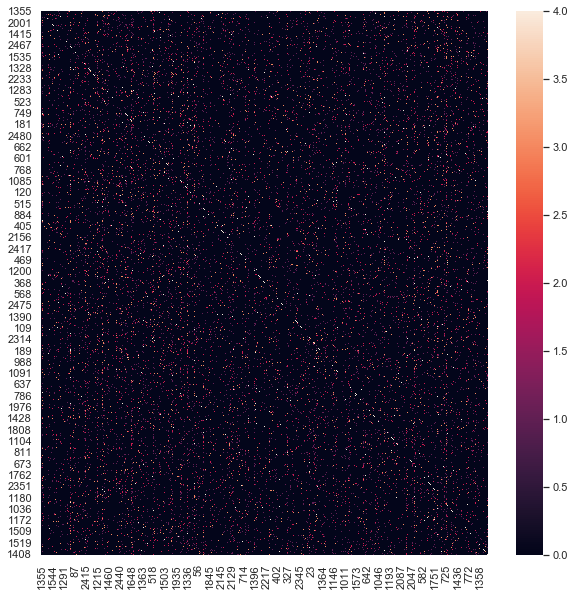

In [50]:
fig = plt.figure(figsize=(10,10))
sns.heatmap(m.MG_matrix)

Accessing the matched group for an example unit with index equal to "1" and visualizing the weights as bar-chart

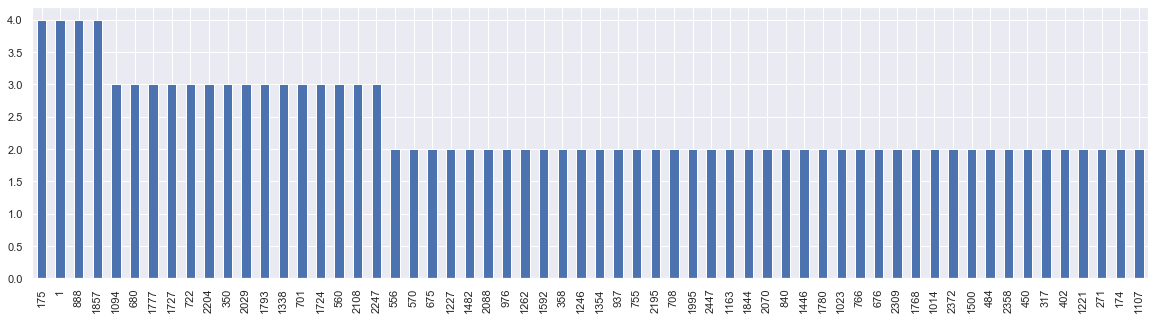

In [38]:
MG1 = m.MG_matrix.loc[1] #matched group for unit "1"
MG1[MG1>1].sort_values(ascending=False).plot(kind='bar',figsize=(20,5)) #Visualizing all the units matched to unit 1 more than once

## ATE and CATE Estimates

In [29]:
m.CATE_df #each row is a cate estimate for a corresponding unit

,avg.CATE,std.CATE,outcome,treated
0,47.232061,21.808950,-15.313091,0.0
1,40.600643,21.958906,-16.963202,0.0
2,40.877320,22.204570,9.527929,1.0
3,37.768578,19.740320,-3.940218,0.0
4,39.920257,21.744433,-8.011915,0.0
...,...,...,...,...
2495,49.227788,21.581176,-14.529871,0.0
2496,42.352355,21.385861,19.570055,1.0
2497,43.737763,19.859275,-16.342666,0.0
2498,41.189297,20.346711,-9.165242,0.0


Estimate Average Treatment Effect (ATE)

In [67]:
ATE = m.CATE_df['avg.CATE'].mean()
ATE

42.29673993471417

Visualizing ATE and probability density function of CATE (using KDE plot)

Text(38.29673993471417, 0.04, '$\\hat{ATE}$')

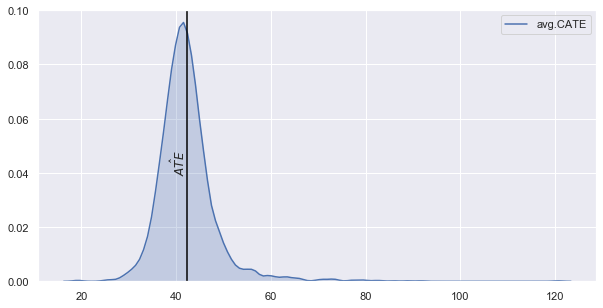

In [69]:
fig = plt.figure(figsize=(10,5))
sns.kdeplot(m.CATE_df['avg.CATE'],shade=True)
plt.axvline(ATE,c='black')
plt.text(ATE-4,0.04,'$\hat{ATE}$',rotation=90)

## MALTS Arguments

1. outcome: Name of the outcome variable column in the data
2. treatment: Name of the treatment variable column in the data
3. data: Data in the pandas Dataframe format
4. discrete: List of column names which are discrete (dummified); Default=[]
5. C: Regularization constant; Default=1
6. k_tr: Size of matched group in training step; Default=15
7. k_est: Size of matched group in estimation step; Default=50
8. estimator: CATE estimator inside a matched group; Default='linear'; Options: 'linear','mean' or 'RF'
9. smooth_cate: Boolean to smoothen CATE estimates by fitting a regression model; Default=True
10. reweight: Reweight treated and control groups as per their respective sample sizes in training step; Default=False,
11. n_splits: Number of splits of the data for n_split-fold procedure; Default=5
12. n_repeats: Number of repeats of the whole procedure; Default=1
13. output_format: Output format of CATE dataframe; Default='brief'; Options: 'brief' or 'full'

# Visualization

## Looking Inside a Matched-Group

Plotting the X1 and X2 marginal of matched-group of unit "0" 

Text(0.5, 1, 'Matched Group for Unit-0')

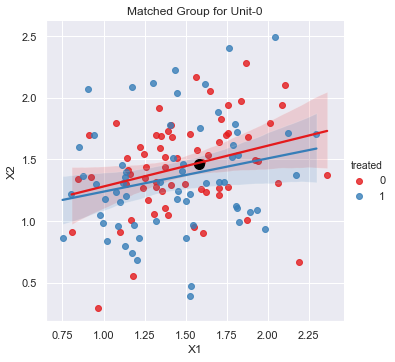

In [112]:
MG0 = m.MG_matrix.loc[0] #fetching the matched group
matched_units_idx = MG0[MG0!=0].index #getting the indices of the matched units 
matched_units = df.loc[matched_units_idx] #fetching the data of matched units

sns.lmplot(x='X1', y='X2', hue='treated', data=matched_units,palette="Set1") #plotting the MG on (X1,X2)
plt.scatter(x=[df.loc[0,'X1']],y=[df.loc[0,'X2']],c='black',s=100) #plotting the unit-0 on (X1,X2)
plt.title('Matched Group for Unit-0') #setting title of the plot

## Plotting CATE versus covariate

Plotting CATE v.s. X1

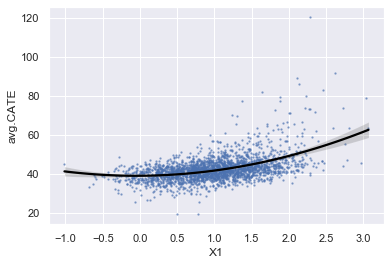

In [133]:
data_w_cate = df.join(m.CATE_df, rsuffix='_').drop(columns=['outcome_','treated_']) #joining cate dataframe with data

sns.regplot( x='X1', y='avg.CATE', data=data_w_cate, scatter_kws={'alpha':0.5,'s':2}, line_kws={'color':'black'}, order=2 ) #fitting a degree 2 polynomial X1 on CATE